In [1]:
from agent import DGQNAgent, train
from routing_env import RoutingEnv
import networkx as nx
import torch

Using backend: pytorch


In [2]:
g = nx.petersen_graph()
env = RoutingEnv(g)
dgl_graph = env.get_dgl_graph()
model = DGQNAgent(env.obs_dim, env.act_dim, dgl_graph)

epoch:  0  average score 728.0 epsilon 1.00
epoch:  1  average score 608.0 epsilon 1.00
epoch:  2  average score 645.3 epsilon 1.00
epoch:  3  average score 700.0 epsilon 1.00
epoch:  4  average score 713.6 epsilon 1.00
epoch:  5  average score 713.3 epsilon 1.00
epoch:  6  average score 718.9 epsilon 1.00
epoch:  7  average score 738.0 epsilon 0.99
epoch:  8  average score 712.9 epsilon 0.99
epoch:  9  average score 732.0 epsilon 0.99
epoch:  10  average score 736.0 epsilon 0.99
epoch:  11  average score 727.3 epsilon 0.99
epoch:  12  average score 715.1 epsilon 0.99
epoch:  13  average score 708.6 epsilon 0.99
epoch:  14  average score 700.3 epsilon 0.99
epoch:  15  average score 692.0 epsilon 0.99
epoch:  16  average score 688.5 epsilon 0.98
epoch:  17  average score 671.6 epsilon 0.98
epoch:  18  average score 663.2 epsilon 0.98
epoch:  19  average score 660.4 epsilon 0.98
epoch:  20  average score 674.3 epsilon 0.98
epoch:  21  average score 690.9 epsilon 0.98
epoch:  22  average 

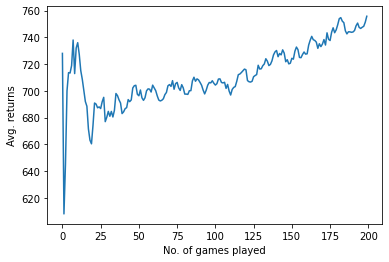

done


In [7]:
train(model, env, num_epochs=1000)

In [10]:
torch.save(model, "model.pt")

In [11]:
model = torch.load("model.pt")

epoch:  0  average score 664.0 epsilon 1.00
epoch:  1  average score 780.0 epsilon 1.00
epoch:  2  average score 818.7 epsilon 1.00
epoch:  3  average score 806.0 epsilon 1.00
epoch:  4  average score 809.6 epsilon 1.00
epoch:  5  average score 753.3 epsilon 1.00
epoch:  6  average score 763.4 epsilon 1.00
epoch:  7  average score 767.0 epsilon 0.99
epoch:  8  average score 776.9 epsilon 0.99
epoch:  9  average score 784.8 epsilon 0.99


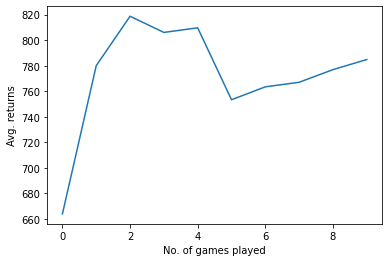

done


In [12]:
train(model, env, num_epochs=10)